In [108]:
import random
from typing import Any
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [109]:
def roll_strategy(min_rolls=1, n_sides=6, n_dices=3) -> tuple[int, Any]:
    roll_dices = lambda n_sides, n_dices: [
        random.randint(0, n_sides - 1) for _ in range(n_dices)
    ]

    finished = False
    rolls = 0
    all_dices: Counter[int] = Counter()
    while rolls < min_rolls or not finished:
        dices = roll_dices(n_sides, n_dices)
        rolls += 1
        all_dices.update(dices)

        two_most_commons = all_dices.most_common(2)
        if len(two_most_commons) == 1: # triple case
            continue
        most_common, second_most_common = two_most_commons

        # check stop conditions
        if most_common[1] > second_most_common[1]:  # get count
            finished = True
    result = all_dices.most_common(1)[0][0]
    return result, {"rolls": rolls}

In [110]:
meta_rolls = [roll_strategy() for _ in range(int(1e6))]
results = [x[0] for x in meta_rolls]
attempts = [x[1]["rolls"] for x in meta_rolls]

In [111]:
def hist_plot(data):
    bins = np.histogram_bin_edges(data)
    bins = np.concatenate([bins, [bins[-1] + (bins[-1] - bins[-2])]]) # extend one bin so plot is better
    return  plt.hist(data, align="left", bins=bins, rwidth=0.6)

(array([166775.,      0., 166592.,      0., 166214.,      0., 165711.,
             0., 167374.,      0., 167334.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <BarContainer object of 11 artists>)

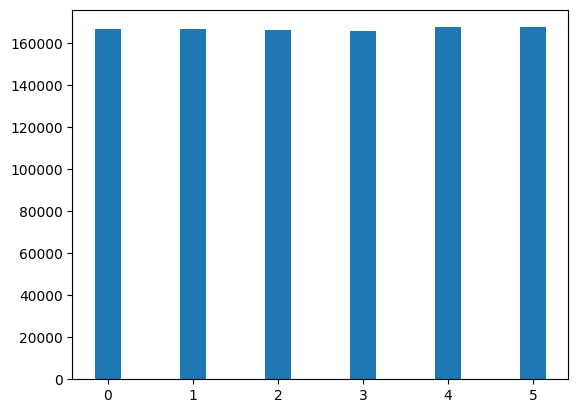

In [112]:
hist_plot(results)

(array([7.59859e+05, 2.00854e+05, 3.29290e+04, 5.35300e+03, 6.08000e+02,
        3.28000e+02, 5.20000e+01, 1.60000e+01, 0.00000e+00, 0.00000e+00,
        1.00000e+00]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ,
        20.8]),
 <BarContainer object of 11 artists>)

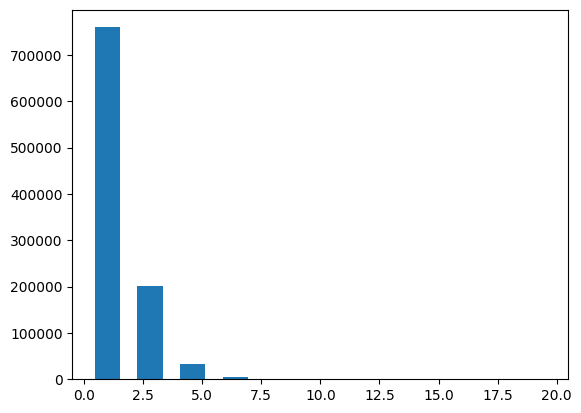

In [113]:
hist_plot(attempts)